In [1]:
# Necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# loading the data
df = pd.read_csv('creditcard.csv')




In [2]:
# Data Exploration

In [3]:

# Display the first few rows
print(df.head())

# Display summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())



   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
# Data Visualization

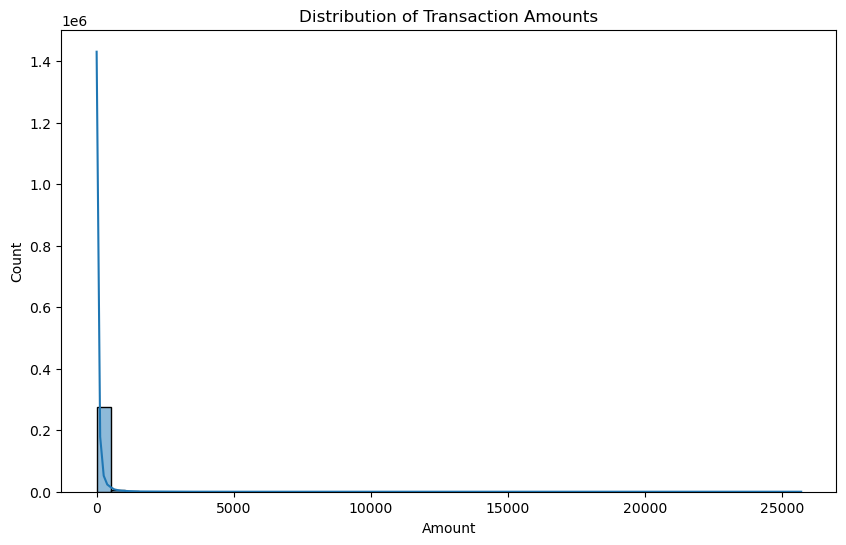

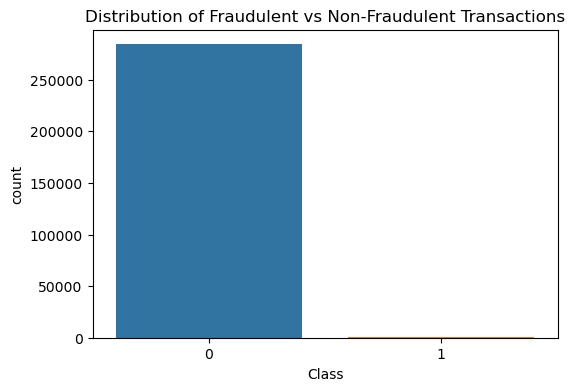

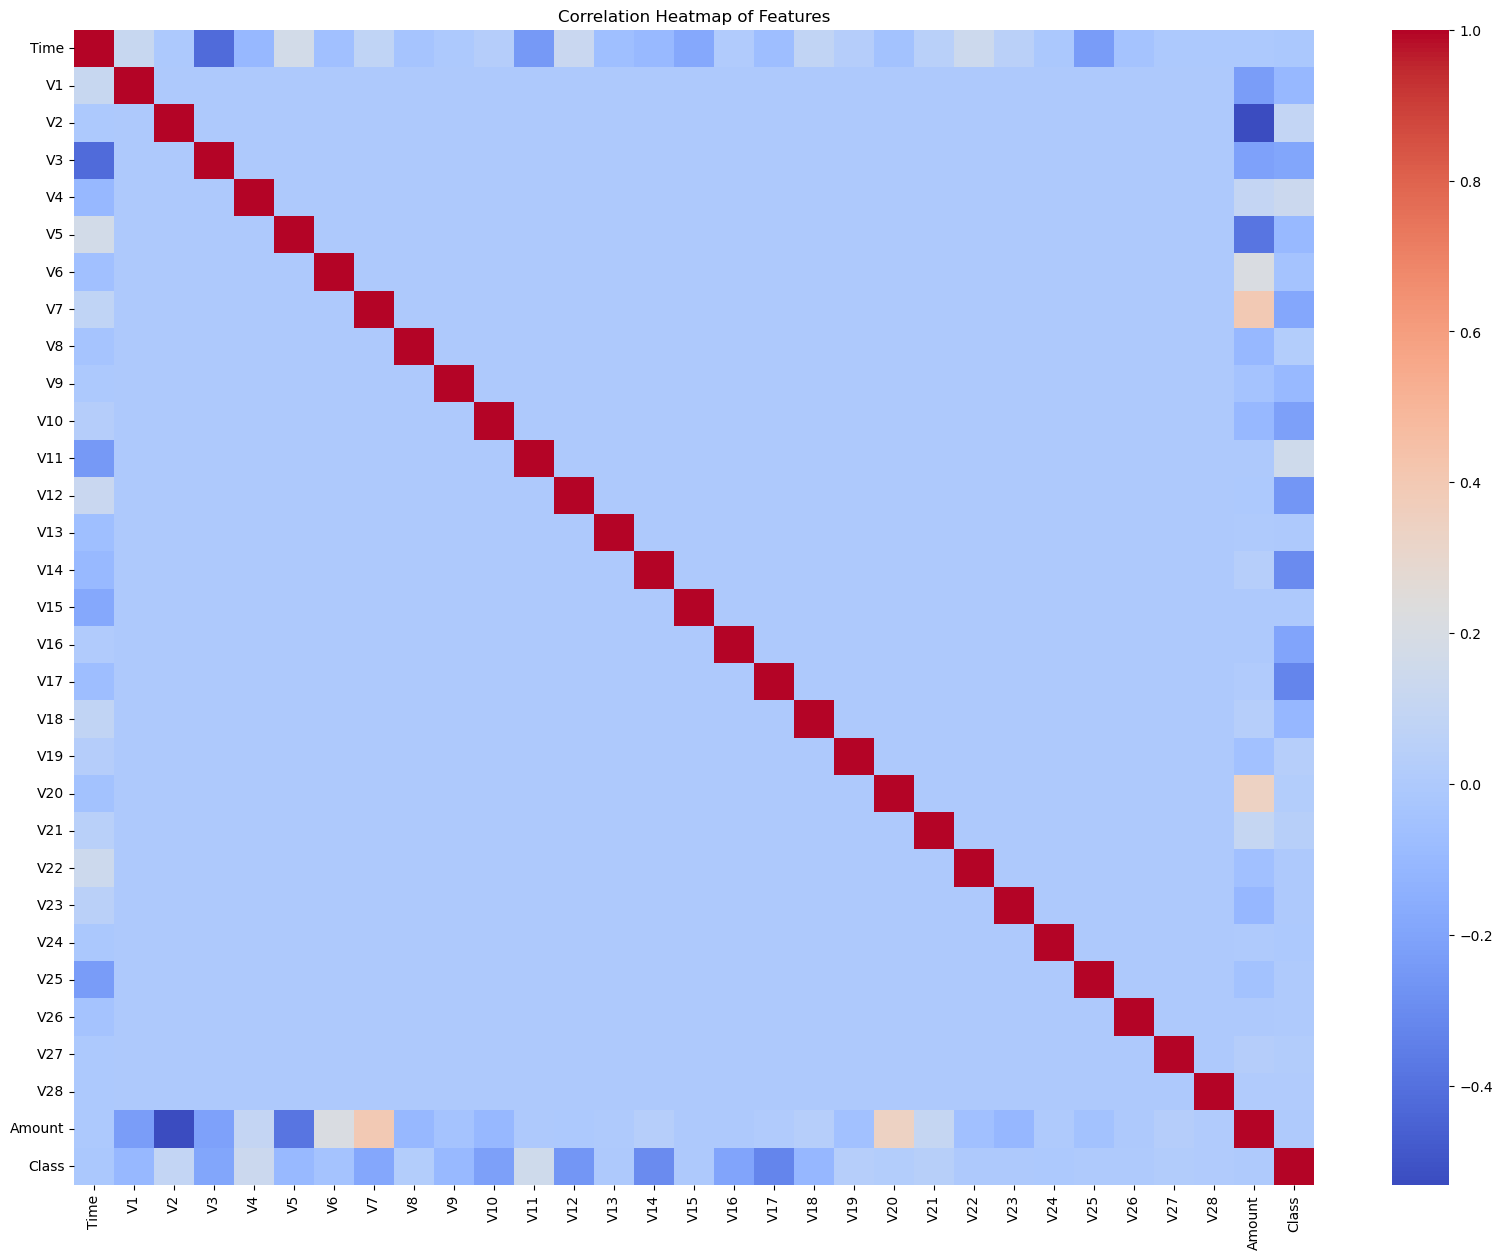

In [5]:

# Distribution of the 'Amount' feature
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.show()

# Distribution of the target variable 'Class'
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

# Correlation heatmap of all features
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

In [6]:
# Calculation of class imbalance 

In [7]:
# Calculate the ratio of fraudulent to non-fraudulent transactions
fraudulent_count = df['Class'].sum()  # Sum of 'Class' column gives the number of fraudulent transactions
non_fraudulent_count = len(df) - fraudulent_count  # Total transactions minus fraudulent gives non-fraudulent

ratio = fraudulent_count / non_fraudulent_count

# Print the ratio
print(f"Ratio of fraudulent to non-fraudulent transactions: {ratio:.6f}")

# Display the first few rows of the dataset
print(df.head())


Ratio of fraudulent to non-fraudulent transactions: 0.001730
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.13

In [8]:
# Prepare data for training:

In [9]:
# Step 1: Split the data into features (X) and labels (y)
X = df.drop('Class', axis=1)  # Features: all columns except 'Class'
y = df['Class']  # Labels: 'Class' column

# Step 2: Scale the features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Print the distribution of classes in both training and test sets
print("Training set class distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest set class distribution:")
print(y_test.value_counts(normalize=True))


Training set class distribution:
Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64

Test set class distribution:
Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64


In [10]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Step 1: Convert the data into PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Step 2: Create TensorDataset objects for training and validation
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Step 3: Create DataLoader objects
batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Print the size of the datasets
print(f"Training dataset size: {len(train_dataset)} samples")
print(f"Validation dataset size: {len(test_dataset)} samples")


Training dataset size: 227845 samples
Validation dataset size: 56962 samples


In [11]:
# Neurol Network Model

In [12]:
import torch.nn as nn
import torch.nn.functional as F

# Step 2: Define the Neural Network Model with explicit parameters
class FraudDetectionNN(nn.Module):
    def __init__(self, input_size, hidden_units_1=128, hidden_units_2=64, dropout_probability=0.3):
        super(FraudDetectionNN, self).__init__()
        
        # First hidden layer
        self.fc1 = nn.Linear(input_size, hidden_units_1)
        
        # Second hidden layer
        self.fc2 = nn.Linear(hidden_units_1, hidden_units_2)
        
        # Output layer
        self.output = nn.Linear(hidden_units_2, 1)
        
        # Dropout layer
        self.dropout = nn.Dropout(dropout_probability)

    def forward(self, x):
        # First hidden layer with ReLU activation and dropout
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        
        # Second hidden layer with ReLU activation and dropout
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        
        # Output layer with sigmoid activation (for binary classification)
        x = torch.sigmoid(self.output(x))
        return x

# Step 3: Instantiate the Model with explicit parameters
input_size = X_train.shape[1]  # Number of features
hidden_units_1 = 128           # Number of units in the first hidden layer
hidden_units_2 = 64            # Number of units in the second hidden layer
dropout_probability = 0.3      # Dropout probability

model = FraudDetectionNN(input_size, hidden_units_1, hidden_units_2, dropout_probability)

# Print the model architecture
print(model)


FraudDetectionNN(
  (fc1): Linear(in_features=30, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)


In [13]:
# Training Functions

In [14]:
# Step 1: Implement loss_batch function
def loss_batch(model, loss_func, xb, yb, opt=None):
    """
    Computes the loss for a batch, performs backpropagation and optimizer step if an optimizer is provided.

    Parameters:
    model (nn.Module): The neural network model.
    loss_func (function): The loss function.
    xb (torch.Tensor): The input batch.
    yb (torch.Tensor): The target batch.
    opt (torch.optim.Optimizer, optional): The optimizer.

    Returns:
    loss.item(): The scalar loss value for the batch.
    """
    # Make predictions
    preds = model(xb)
    
    # Compute the loss
    loss = loss_func(preds, yb.unsqueeze(1))  # unsqueeze to match the dimensions (N, 1) vs (N)
    
    # Perform backpropagation and optimizer step if optimizer is provided
    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()
    
    return loss.item()

# Step 2: Implement train function
def train(model, epochs, loss_func, opt, train_loader, val_loader):
    """
    Trains the model for a specified number of epochs and evaluates it on the validation set after each epoch.

    Parameters:
    model (nn.Module): The neural network model.
    epochs (int): The number of epochs to train.
    loss_func (function): The loss function.
    opt (torch.optim.Optimizer): The optimizer.
    train_loader (DataLoader): The DataLoader for the training set.
    val_loader (DataLoader): The DataLoader for the validation set.
    """
    for epoch in range(epochs):
        # Training phase
        model.train()
        train_losses = []
        for xb, yb in train_loader:
            loss = loss_batch(model, loss_func, xb, yb, opt)
            train_losses.append(loss)
        
        # Validation phase
        model.eval()
        with torch.no_grad():
            val_losses = [loss_batch(model, loss_func, xb, yb) for xb, yb in val_loader]
        
        # Calculate average losses
        train_loss = torch.tensor(train_losses).mean().item()
        val_loss = torch.tensor(val_losses).mean().item()
        
        print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

# Example of how to use the functions
loss_func = nn.BCELoss()  # Binary Cross Entropy Loss
opt = torch.optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# Train the model
train(model, epochs=200, loss_func=loss_func, opt=opt, train_loader=train_loader, val_loader=test_loader)


Epoch 1/200, Training Loss: 0.0117, Validation Loss: 0.0037
Epoch 2/200, Training Loss: 0.0046, Validation Loss: 0.0042
Epoch 3/200, Training Loss: 0.0043, Validation Loss: 0.0033
Epoch 4/200, Training Loss: 0.0043, Validation Loss: 0.0050
Epoch 5/200, Training Loss: 0.0041, Validation Loss: 0.0033
Epoch 6/200, Training Loss: 0.0042, Validation Loss: 0.0034
Epoch 7/200, Training Loss: 0.0041, Validation Loss: 0.0033
Epoch 8/200, Training Loss: 0.0041, Validation Loss: 0.0037
Epoch 9/200, Training Loss: 0.0039, Validation Loss: 0.0038
Epoch 10/200, Training Loss: 0.0040, Validation Loss: 0.0037
Epoch 11/200, Training Loss: 0.0039, Validation Loss: 0.0034
Epoch 12/200, Training Loss: 0.0040, Validation Loss: 0.0033
Epoch 13/200, Training Loss: 0.0039, Validation Loss: 0.0038
Epoch 14/200, Training Loss: 0.0039, Validation Loss: 0.0034
Epoch 15/200, Training Loss: 0.0038, Validation Loss: 0.0039
Epoch 16/200, Training Loss: 0.0040, Validation Loss: 0.0035
Epoch 17/200, Training Loss: 0.00

In [15]:
# Model Evaluation

In [16]:
import numpy as np
import torch
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, average_precision_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Generate Predictions
def predict(model, data_loader):
    model.eval()  # Set model to evaluation mode
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for xb, yb in data_loader:
            preds = model(xb)
            all_preds.append(preds.cpu().numpy())
            all_labels.append(yb.cpu().numpy())
    
    all_preds = np.concatenate(all_preds)
    all_labels = np.concatenate(all_labels)
    
    return all_preds, all_labels

# Convert logits to binary class labels
def logits_to_labels(logits, threshold=0.5):
    return (logits >= threshold).astype(int)

# Get predictions and labels from the test set
test_preds, test_labels = predict(model, test_loader)
test_labels = test_labels.reshape(-1)  # Flatten the array

# Convert predictions to binary labels
test_preds_labels = logits_to_labels(test_preds)

# Calculate evaluation metrics
conf_matrix = confusion_matrix(test_labels, test_preds_labels)
classification_rep = classification_report(test_labels, test_preds_labels)
roc_auc = roc_auc_score(test_labels, test_preds)
auprc = average_precision_score(test_labels, test_preds)

# Print metrics
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_rep)

print(f"ROC AUC: {roc_auc:.4f}")
print(f"Average Precision (AUPRC): {auprc:.4f}")



Confusion Matrix:
[[56848    16]
 [   17    81]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56864
         1.0       0.84      0.83      0.83        98

    accuracy                           1.00     56962
   macro avg       0.92      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC: 0.9723
Average Precision (AUPRC): 0.8284


In [17]:
# Confusion Matrix and Accuracy:

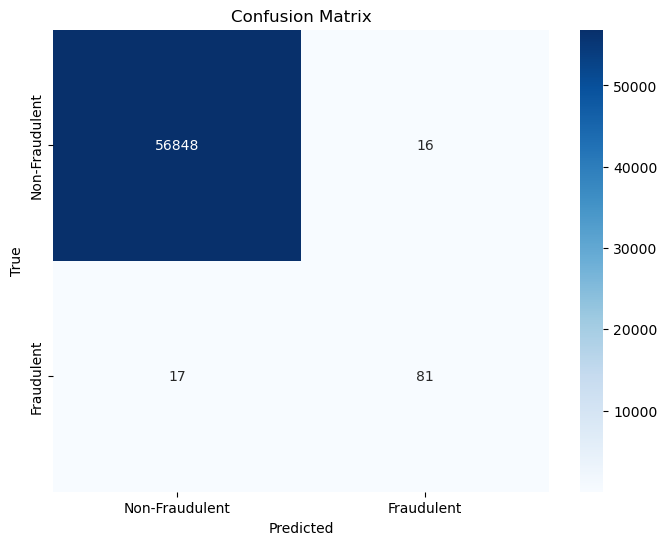

Accuracy: 0.9994


In [18]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Fraudulent', 'Fraudulent'],
            yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate and print accuracy
accuracy = accuracy_score(test_labels, test_preds_labels)
print(f"Accuracy: {accuracy:.4f}")
